# Import Modules

We will need some basic packages, but will also need to import different AutoRA theorists. Here, we will import our three theorists: Bayesian Machine Scientist, Bayesian Symbolic Regression, and Differentiable Architecture Search. 

Note that we are currently re-structuring the AutoRA package so that all experimentalists and theorists are their own sub-package. As such, once this is complete for the theorists, these imports should be modified to conform to the new structure.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from autora.skl.bms import BMSRegressor
from autora.skl.bsr import BSRRegressor
from autora.skl.darts import DARTSRegressor
from autora.experimentalist.sampler.model_disagreement import model_disagreement_sampler

c:\Users\cwill\GitHub\virtualEnvs\autoraEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define Meta-Space

We will here define X values of interest as well as a ground truth model to derive y values.

In [58]:
#Define meta-parameters
X = np.linspace(start=-3, stop=6, num=10).reshape(-1, 1)

#Define ground truth model
def ground_truth(xs):
    noise = np.random.rand(len(xs))
    y = (xs ** 2.0)
    y[xs < 0] = 0
    return y

# Plot the Data

Let's plot the data to see what we are working with.

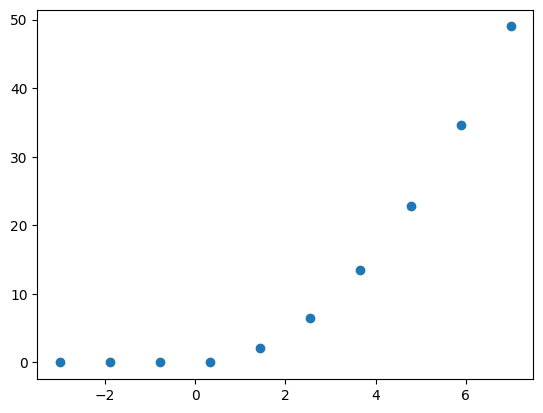

In [4]:
plt.plot(X, ground_truth(X), 'o')
plt.show()

# Define and Fit Theorists

Next, we initialize each theorist and then train them on the data. 

Note that this can take quite some time, especially for the BSR Theorist.

In [5]:
%%capture

#Initiate theorists
bms_theorist = BMSRegressor()
bsr_theorist = BSRRegressor()
darts_theorist = DARTSRegressor()

#Fit theorists
bms_theorist.fit(X,ground_truth(X))
bsr_theorist.fit(X,ground_truth(X))
darts_theorist.fit(X,ground_truth(X))

c:\Users\cwill\GitHub\virtualEnvs\autoraEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
INFO:autora.skl.bms:BMS fitting started
  0%|          | 0/1500 [00:00<?, ?it/s]<lambdifygenerated-47>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(X0)
<lambdifygenerated-48>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(X0)
<lambdifygenerated-49>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(X0)
  0%|          | 1/1500 [00:00<03:10,  7.85it/s]<lambdifygenerated-112>:2: RuntimeWarning: invalid value encountered in power
  return X0**_a0_
<lambdifygenerated-113>:2: RuntimeWarning: invalid value encountered in power
  return X0**_a0_
<lambdifygenerated-114>:2: RuntimeWarning: invalid value encountered in power
  return X0**_a0_
  0%|          | 

DARTSRegressor()

# Plot Theorists on Data

We can then plot each theorist to see how well it recovered the data.

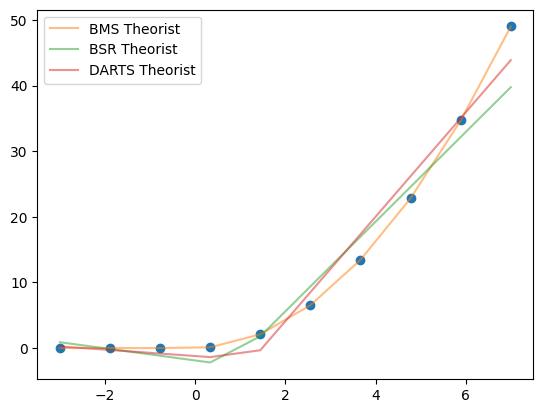

In [6]:
plt.plot(X, ground_truth(X), 'o')
plt.plot(X, bms_theorist.predict(X), alpha = .5, label = 'BMS Theorist')
plt.plot(X, bsr_theorist.predict(X), alpha = .5, label = 'BSR Theorist')
plt.plot(X, darts_theorist.predict(X), alpha = .5, label = 'DARTS Theorist')
plt.legend()
plt.show()

# Plot Model Disagreements

We can also plot the disagreement between each pair of theorists. The grey dashed lines represent the degree of disagreement for each datapoint. Computationally the Model Disagreement Sampler takes the square of these numbers to determine where disagreement is largest. 

[1, 3]


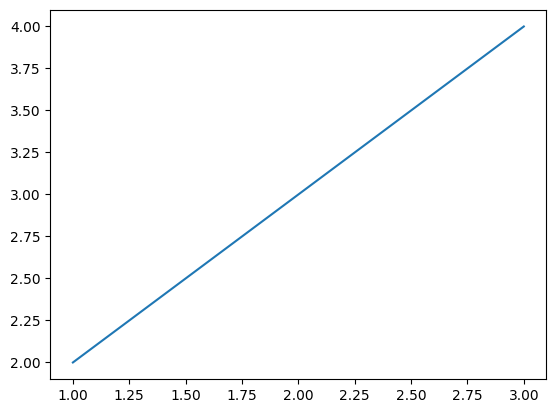

In [31]:
point1 = [1, 2]

point2 = [3, 4]


x_values = [point1[0], point2[0]]

y_values = [point1[1], point2[1]]


print(x_values)
plt.plot(x_values, y_values)

In [39]:
x = 0
print(bsr_theorist.predict(x))
[bsr_theorist.predict(x).astype(float), bsr_theorist.predict(x).astype(float)]

ValueError: Expected 2D array, got 1D array instead:
array=[0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

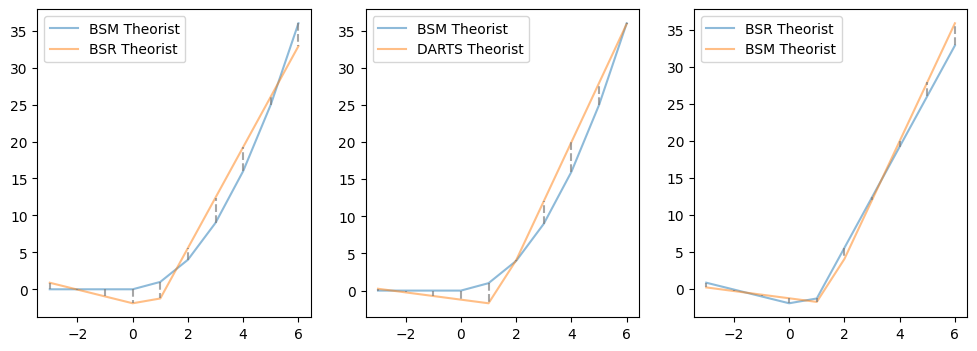

In [60]:
fig, ax = plt.subplots(1,3, figsize=[12,4])

def plot_disagreement(X, model_a, model_b, plot_index, labels):
    ax[plot_index].plot(X, model_a.predict(X), alpha = .5, label = labels[0]) #Plot model a
    ax[plot_index].plot(X, model_b.predict(X), alpha = .5, label = labels[1]) #Plot model b
    for xi, _ in enumerate(X):
        ax[plot_index].plot([X[xi],X[xi]], [model_a.predict(X)[xi], model_b.predict(X)[xi]], alpha = .7, c = 'grey', linestyle = '--') #Plot disagreement
    ax[plot_index].legend()
        
plot_disagreement(X, bms_theorist, bsr_theorist, 0, ['BSM Theorist', 'BSR Theorist'])
plot_disagreement(X, bms_theorist, darts_theorist, 1, ['BSM Theorist', 'DARTS Theorist'])
plot_disagreement(X, bsr_theorist, darts_theorist, 2, ['BSR Theorist', 'BSM Theorist'])
plt.show()

# Run and Report Model Disagreement Samples

Now we will get a proposal from the sampler as to which datapoints to investigate next.

In [51]:
sampler_proposal = model_disagreement_sampler(X, [bms_theorist, bsr_theorist, darts_theorist], 10)

print('New datapoints:\n' + str(sampler_proposal))

New datapoints:
[[ 7.        ]
 [ 3.66666667]
 [ 4.77777778]
 [ 5.88888889]
 [ 2.55555556]
 [ 1.44444444]
 [ 0.33333333]
 [-0.77777778]
 [-3.        ]
 [-1.88888889]]


# Plot New Datapoints With Old

We can then plot our new datapoints with our previous ones to demonstrate our new dataset of investigation for then next cycle.

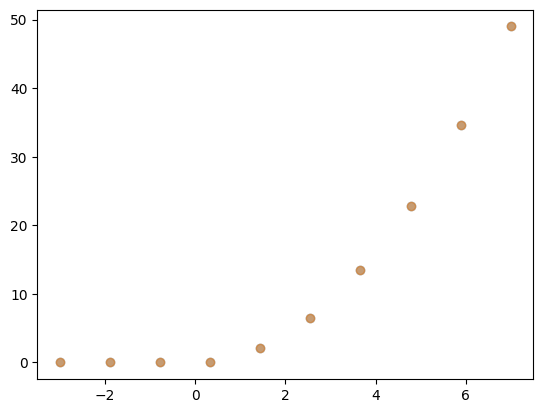

[[-3.        ]
 [-1.88888889]
 [-0.77777778]
 [ 0.33333333]
 [ 1.44444444]
 [ 2.55555556]
 [ 3.66666667]
 [ 4.77777778]
 [ 5.88888889]
 [ 7.        ]]


In [55]:
plt.plot(X, ground_truth(X), 'o', alpha = .5, label = 'Original Datapoints')
plt.plot(sampler_proposal, ground_truth(sampler_proposal), 'o', alpha = .5, label = 'Proposed Datapoints')
plt.show()